In [1]:
import pandas as pd

In [79]:
covid = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv") 
tc = covid['totale_casi']
tt = covid['tamponi']
RS= covid['ricoverati_con_sintomi']
date=covid['data'] 
TI=covid['terapia_intensiva']
NP=covid['nuovi_positivi']

In [80]:
RS.head()

0    101
1    114
2    128
3    248
4    345
Name: ricoverati_con_sintomi, dtype: int64

In [81]:
len(RS)

598

In [112]:
covid["data"] = pd.to_datetime(covid["data"]).dt.date
covid.data

0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
          ...    
593    2021-10-09
594    2021-10-10
595    2021-10-11
596    2021-10-12
597    2021-10-13
Name: data, Length: 598, dtype: object

In [103]:
covid["month"] = pd.to_datetime(covid["data"]).dt.month
covid.month

0       2
1       2
2       2
3       2
4       2
       ..
593    10
594    10
595    10
596    10
597    10
Name: month, Length: 598, dtype: int64

In [104]:
covid["day"] = pd.to_datetime(covid["data"]).dt.day
covid.day

0      24
1      25
2      26
3      27
4      28
       ..
593     9
594    10
595    11
596    12
597    13
Name: day, Length: 598, dtype: int64

In [120]:
covid['DayMonth'] = covid['data'].apply(lambda x:x.strftime('%d-%m'))
covid.DayMonth

0      24-02
1      25-02
2      26-02
3      27-02
4      28-02
       ...  
593    09-10
594    10-10
595    11-10
596    12-10
597    13-10
Name: DayMonth, Length: 598, dtype: object

In [121]:
RS_2021=RS[len(RS)-60:len(RS)]
RS_2020=RS[len(RS)-60-365:len(RS)-365]

In [127]:
DayMonth=covid.DayMonth

In [158]:
covid

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,month,day,dataplot,MonthDay,DayMonth
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,...,NaN,NaN,NaN,NaN,NaN,2,24,covid.monthcovid.day,24-02,24-02
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,...,NaN,NaN,NaN,NaN,NaN,2,25,covid.monthcovid.day,25-02,25-02
2,2020-02-26,ITA,128,36,164,221,385,74,78,3,...,NaN,NaN,NaN,NaN,NaN,2,26,covid.monthcovid.day,26-02,26-02
3,2020-02-27,ITA,248,56,304,284,588,203,250,45,...,NaN,NaN,NaN,NaN,NaN,2,27,covid.monthcovid.day,27-02,27-02
4,2020-02-28,ITA,345,64,409,412,821,233,238,46,...,NaN,NaN,NaN,NaN,NaN,2,28,covid.monthcovid.day,28-02,28-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2021-10-09,ITA,2692,367,3059,82243,85302,-624,2748,4481462,...,NaN,4524928.0,173110.0,61075375.0,33985752.0,10,9,covid.monthcovid.day,09-10,09-10
594,2021-10-10,ITA,2651,364,3015,81793,84808,-494,2278,4484207,...,NaN,4527045.0,173271.0,61154936.0,34176235.0,10,10,covid.monthcovid.day,10-10,10-10
595,2021-10-11,ITA,2688,374,3062,81044,84106,-702,1516,4486391,...,NaN,4528481.0,173351.0,61203810.0,34242137.0,10,11,covid.monthcovid.day,11-10,11-10
596,2021-10-12,ITA,2665,370,3035,79511,82546,-1560,2494,4490388,...,NaN,4530578.0,173740.0,61308451.0,34452781.0,10,12,covid.monthcovid.day,12-10,12-10


In [129]:
date[5]

datetime.date(2020, 2, 29)

In [130]:
X = []
for i in range(1, len(RS_2021)+1):
 X.append([i])

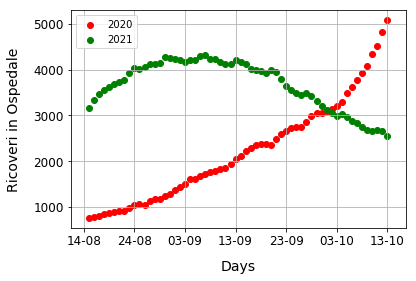

In [185]:
import matplotlib.pyplot as plt
plt.scatter(X,RS_2020, color='red', label='2020')
plt.scatter(X,RS_2021, color='green', label='2021')
plt.grid()
plt.xlabel('Days', fontsize=14,labelpad = 12)
plt.ylabel('Ricoveri in Ospedale', fontsize=14, labelpad = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper left")
plt.xticks([0,10,20,30,40,50,60], [DayMonth[len(RS)-61],DayMonth[len(RS)-51],DayMonth[len(RS)-41],DayMonth[len(RS)-31],DayMonth[len(RS)-21],DayMonth[len(RS)-11],DayMonth[len(RS)-1]])
plt.show()

In [57]:
TI_2021=TI[len(RS)-60:len(RS)]
TI_2020=TI[len(RS)-60-365:len(RS)-365]
len(X)


60

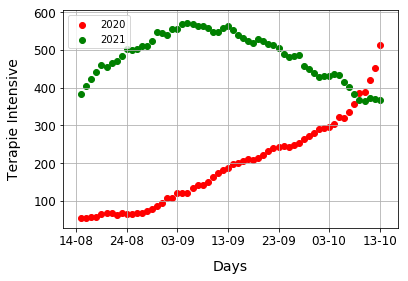

In [186]:
import matplotlib.pyplot as plt
plt.scatter(X,TI_2020, color='red', label='2020')
plt.scatter(X,TI_2021, color='green',label='2021')
plt.grid()
plt.xlabel('Days',fontsize=14, labelpad = 12)
plt.ylabel('Terapie Intensive',fontsize=14, labelpad = 12)
plt.legend(loc="upper left")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,10,20,30,40,50,60], [DayMonth[len(RS)-61],DayMonth[len(RS)-51],DayMonth[len(RS)-41],DayMonth[len(RS)-31],DayMonth[len(RS)-21],DayMonth[len(RS)-11],DayMonth[len(RS)-1]])
plt.show()

plt.xticks([0,5,10,15,20,25,30,35,40],
 [“24 Febr”, “29 Febr”, “5 Mar”, “10 Mar”, “15 Mar”, “20 Mar”, “25 Mar”, “30 Mar”, “4 Apr”])

In [45]:
NP_2021=NP[len(NP)-60:len(NP)]
NP_2020=NP[len(NP)-60-365:len(NP)-365]

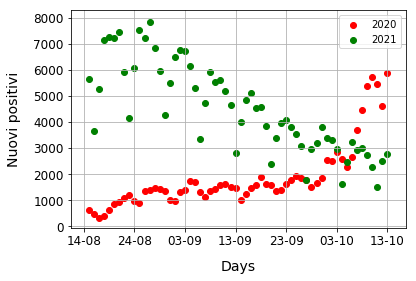

In [187]:
import matplotlib.pyplot as plt
plt.scatter(X,NP_2020, color='red',label='2020')
plt.scatter(X,NP_2021, color='green',label='2021')
plt.grid()
plt.xlabel('Days',fontsize=14, labelpad = 12)
plt.ylabel('Nuovi positivi',fontsize=14, labelpad = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right")
plt.xticks([0,10,20,30,40,50,60], [DayMonth[len(RS)-61],DayMonth[len(RS)-51],DayMonth[len(RS)-41],DayMonth[len(RS)-31],DayMonth[len(RS)-21],DayMonth[len(RS)-11],DayMonth[len(RS)-1]])
plt.show()